In [4]:
import tabs
from rdkit import Chem
from rdkit.Chem import AllChem

Example molecule

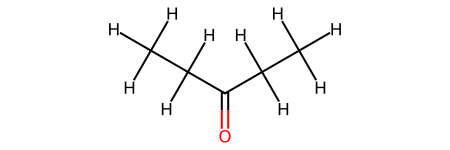

In [5]:
mol = Chem.AddHs(Chem.MolFromSmiles("CCC(=O)CC"))
mol

Checking the torsion assignments by ETKDGv3

In [6]:
tabs.GetMultiplicityAllBonds(mol)

[('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r', '0 1 2 3', 4),
 ('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r', '5 4 2 3', 4)]

Getting nTABS

In [7]:
tabs.GetnTABS(mol)

10

In [8]:
ps = AllChem.ETKDGv3()
AllChem.EmbedMolecule(mol, ps)

0

In [9]:
tabs.GetTABS(mol)

14

Getting an ensemble to then analyze it with TABS

In [10]:
AllChem.EmbedMultipleConfs(mol,50,ps)

Original CSD extracted torsion distribution and the fit as per J. Chem. Inf. Model. 2015, 55, 12, 2562–2574

In [11]:
# this part of the API is currently not available to the public
# tabs.PlotOrgDistribution('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r')

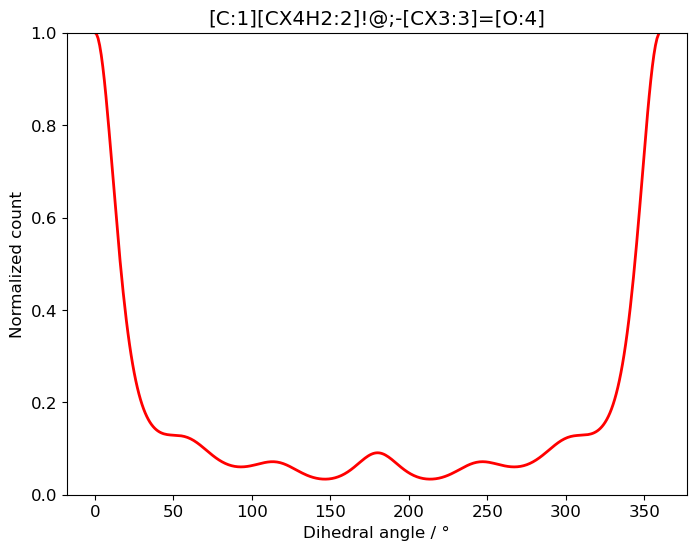

In [12]:
tabs.PlotOrgDistributionFitOnly('[C:1][CX4H2:2]!@;-[CX3:3]=[O:4]', 'r')

Checking the torsion distributions in the created ensemble

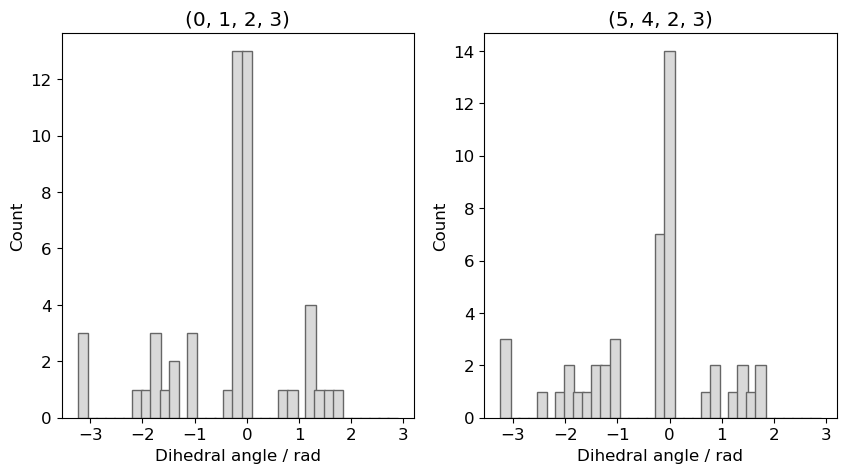

In [13]:
tabs.PlotDihedralDistributions(mol,[(0,1,2,3),(5,4,2,3)]);

Getting the TABS values for all ensemble conformers

In [14]:
cids, cTabs = tabs.GetTABSMultipleConfs(mol)

In [15]:
cTabs

[12,
 11,
 11,
 11,
 12,
 11,
 12,
 12,
 13,
 14,
 11,
 13,
 14,
 14,
 11,
 11,
 11,
 13,
 11,
 11,
 11,
 11,
 11,
 13,
 14,
 11,
 13,
 11,
 11,
 11,
 13,
 13,
 11,
 11,
 11,
 14,
 14,
 13,
 13,
 14,
 14,
 11,
 13,
 11,
 11,
 14,
 12,
 14,
 11,
 11]

Get all TABS of the conformers and return a dictionary of the sorted by TABS conformers 

In [16]:
tabsEnsemble = tabs.SortEnsembleByTABS(mol)

In [17]:
tabsEnsemble.keys()

dict_keys([12, 11, 13, 14])

Analyze the returned TABS grouping by intra and inter RMSD

In [18]:
tabs.AnalyzeTABSforIntraRmsd(mol, tabsEnsemble)

{12: [0.04322470255521693,
  0.27685215686077486,
  0.1305800318529203,
  0.2642170704198167,
  0.24693631031992533,
  0.11555847466664608,
  0.23460428515943382,
  0.21325805475520604,
  0.030924813746994437,
  0.21372232137150043],
 11: [0.04676069317557485,
  0.037722355329334226,
  0.5143703161556454,
  0.03397610875994612,
  0.5129696531491131,
  0.47044384951437546,
  0.34585978048603105,
  0.6820894533919146,
  0.09099111901798312,
  0.4710490076235992,
  0.4922394960999169,
  0.03483505368248288,
  0.02661396315459939,
  0.018455322077202997,
  0.040224132154398864,
  0.49612258019642563,
  0.00804286740857648,
  0.0536223266997575,
  0.511359685367458,
  0.496898341893324,
  0.02469003925560304,
  0.4616482034297537,
  0.05109042566680862,
  0.6177966504742656,
  0.029790260525382847,
  0.5281024590275465,
  0.024611323638506957,
  0.5250075194286004,
  0.4837410082275166,
  0.3490084354032785,
  0.6855467831221191,
  0.046565095095555814,
  0.48239951397747377,
  0.5168954977

In [19]:
tabs.AnalyzeTABSforInterRmsd(mol, tabsEnsemble)

{12: [0.5515137283268906,
  0.576725720442143,
  0.568321509498094,
  0.6897949000141937,
  0.5691559131231438,
  0.34081125822668884,
  0.3357455297369306,
  0.6643557122549727,
  0.6895316482598516,
  0.6065730119812737,
  0.3481859888199911,
  0.7165796880960047,
  0.5662251630911508,
  0.5632316774155837,
  0.5616782527380677,
  0.5712614837623659,
  0.33165353627169075,
  0.5546194107257676,
  0.5789994510388915,
  0.6951301179498741,
  0.33854470442288404,
  0.5563431284004402,
  0.3472624089535038,
  0.5769424945376591,
  0.6228997691580827,
  0.5573720574908381,
  0.5839386999697243,
  0.5738771108849896,
  0.6759458993225114,
  0.575003912174436,
  0.35027044594314316,
  0.35051892972970045,
  0.6632203202505781,
  0.6832241252920245,
  0.6151645748123684,
  0.36488189781617747,
  0.7074425552703991,
  0.5718757235828437,
  0.5689476667504573,
  0.5679279543372324,
  0.5775939037378569,
  0.34400737782961405,
  0.5603866482827412,
  0.5869488130793474,
  0.683888733376137,
  0